In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("student-scores.csv")
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


In [3]:
X = df[["math_score", "history_score", "physics_score",
        "chemistry_score", "biology_score", "english_score", "geography_score"]]

In [4]:
y = df["gender"]

In [5]:
# 1. Split Data (Train/Test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# 2. Train Logistic Regression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# 3. Predictions & Evaluation

y_pred = model.predict(X_test)

In [8]:
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Model Evaluation
Accuracy: 0.5125

Classification Report:
               precision    recall  f1-score   support

      female       0.51      0.47      0.49       200
        male       0.51      0.55      0.53       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400


Confusion Matrix:
 [[ 95 105]
 [ 90 110]]


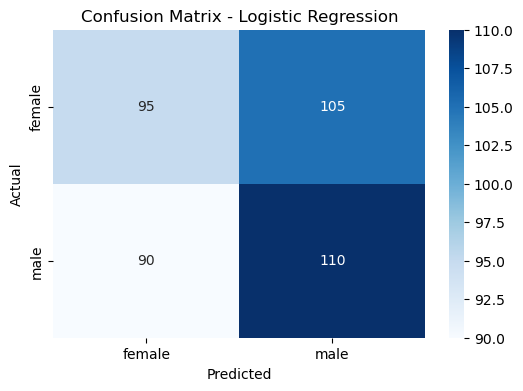

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()